# Dataset Description: Chest CT-Scan Images

## Overview
This dataset contains chest CT-scan images for the classification of chest cancer types.

## Metadata
* **Author:** Mohamed Haney
* **License:** Open Data Commons Open Database License (ODbL) v1.0
* **Downloads:** 44,031
* **Data Type:** CT Scan
* **Total Images:** 1000

## Classes
The dataset is categorized into the following 4 classes:
1.  Adenocarcinomas
2.  Large cell carcinoma
3.  Squamous cell carcinoma
4.  Normal

In [1]:
from google.colab import drive
import zipfile
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define the path to your dataset
# Note: Ensure 'AI DATASET.zip' is in the correct folder in your Drive.
# Update the path below if it is inside a specific folder (e.g., '/content/drive/MyDrive/Datasets/AI DATASET.zip')
zip_path = '/content/drive/MyDrive/AI DATASET.zip'
extract_path = '/content/dataset'

# 3. Extract the Dataset
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Dataset extracted successfully to {extract_path}")
else:
    print(f"File not found at {zip_path}. Please check the file path.")

Mounted at /content/drive
Dataset extracted successfully to /content/dataset


In [6]:
# Inspect the extracted dataset directory to find the correct base_path
import os

extract_path = '/content/dataset'
print(f"Contents of {extract_path}:")
if os.path.exists(extract_path):
    for root, dirs, files in os.walk(extract_path):
        level = root.replace(extract_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        # Limit directory listing depth to avoid overwhelming output
        if level < 2:
            for d in dirs:
                print(f'{indent}    {d}/')
            for f in files:
                print(f'{indent}    {f}')
        else:
            print(f'{indent}    ...') # Indicate further content
else:
    print(f"The extraction path '{extract_path}' does not exist. Please re-run the extraction cell.")


Contents of /content/dataset:
dataset/
    Data/
    Data/
        train/
        test/
        valid/
        train/
            ...
            normal/
                ...
            large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/
                ...
            adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/
                ...
            squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/
                ...
        test/
            ...
            normal/
                ...
            squamous.cell.carcinoma/
                ...
            large.cell.carcinoma/
                ...
            adenocarcinoma/
                ...
        valid/
            ...
            normal/
                ...
            large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/
                ...
            adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/
                ...
            squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/
                ...


Inspecting classes in: /content/dataset/Data/train
normal: 148 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images


/tmp/ipython-input-2278052076.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valid_classes, y=class_counts, palette='viridis')


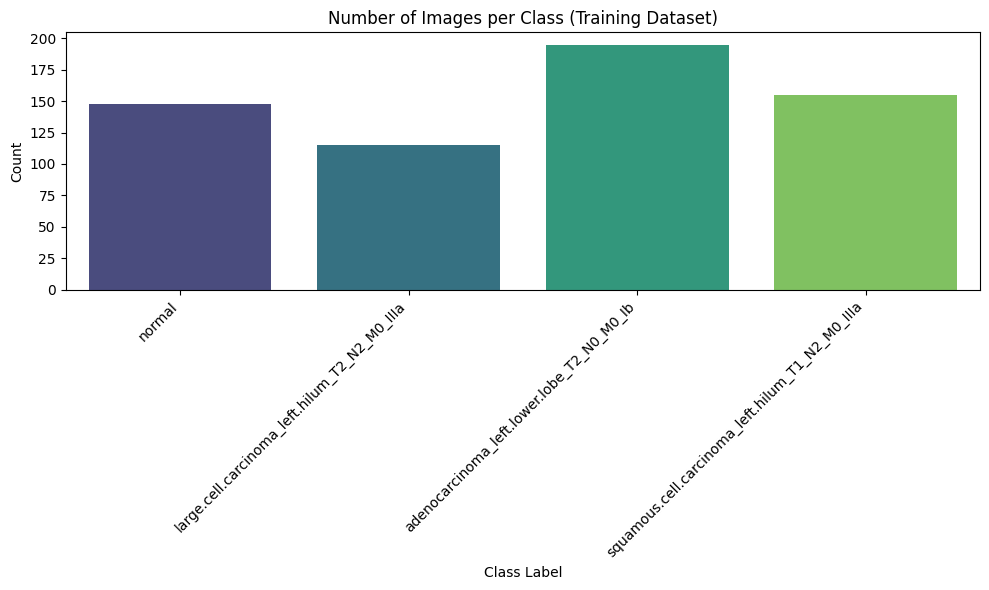

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the base path for the training dataset
base_path = '/content/dataset/Data/train'

# Get the actual class names (subdirectories) from the base_path
# Filter out any non-directory files
classes = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Count images in each class
class_counts = []
valid_classes = []

print(f"Inspecting classes in: {base_path}")

for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    if os.path.exists(class_path):
        count = len(os.listdir(class_path))
        class_counts.append(count)
        valid_classes.append(class_name)
        print(f"{class_name}: {count} images")
    else:
        print(f"Warning: Class path not found for {class_name} at {class_path}")

if not valid_classes:
    print("No valid classes found to plot. Please check 'base_path' and its contents.")
else:
    # Plotting the distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=valid_classes, y=class_counts, palette='viridis')
    plt.title('Number of Images per Class (Training Dataset)')
    plt.xlabel('Class Label')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Model Selection: Convolutional Neural Network (CNN)

## Proposed Model
**Convolutional Neural Network (CNN)**

## Why CNN?
CNNs are the industry standard for image classification tasks like CT scans for several reasons:
* **Spatial Hierarchy:** They automatically detect spatial hierarchies of features, from simple edges to complex shapes (like tumors).
* **Translation Invariance:** A tumor is recognized regardless of where it appears in the image.
* **Parameter Efficiency:** Shared weights in convolutional layers make them more efficient than fully connected networks for processing image pixels.

## Alternatives to CNN
If not using a standard CNN, the following architectures could be used:
1.  **Vision Transformers (ViT):** A newer architecture that treats image patches as sequences, often outperforming CNNs on very large datasets.
2.  **ResNet / DenseNet:** Advanced variations of CNNs that solve the vanishing gradient problem, allowing for much deeper networks.
3.  **Transfer Learning (e.g., VGG16, Inception):** Using pre-trained weights from ImageNet and fine-tuning them on this CT scan dataset (highly recommended for small datasets like 1000 images).
4.  **Traditional ML (SVM/Random Forest):** Requires manual feature extraction (e.g., HOG, SIFT) before classification, though generally less accurate than Deep Learning for raw images.

# Problem Statement & Medical Context

Lung cancer is one of the leading causes of cancer-related deaths worldwide. Early and accurate diagnosis is crucial for treatment planning. This project aims to automate the classification of chest CT scans into four specific categories:

1.  **Adenocarcinomas:** The most common form of lung cancer, occurring in the mucus-secreting glands of the lung.
2.  **Squamous Cell Carcinoma:** A type of cancer that forms in the squamous cells lining the airways.
3.  **Large Cell Carcinoma:** A fast-growing cancer that can appear in any part of the lung.
4.  **Normal:** Healthy lung tissue with no evidence of carcinoma.

By using a CNN, we aim to reduce the time required for diagnosis and assist radiologists in identifying malignancies.